In [1]:
import radical.analytics as ra
import radical.pilot as rp
import radical.utils as ru

## Import session
Session provides profiling data, the data for this particular experiment can be found here: https://github.com/radical-experiments/deepdriveMD/tree/master/data/raw/incite

The latest run with adrp completes 10 iterations by using 60 gpus.

In [2]:
sid = 're.session.login4.hrlee.018463.0000'
session = ra.Session(sid, "radical.pilot")

## Pilot Lifetime
This is active time of a job, for example the pilot job is created like:
```
235238  hrlee      RUN    421      batch       Jul 20 17:49  Jul 21 05:49  pilot.0000                    
```

And the duration between `bootstrap` and `END` states i.e. FAILED, DONE, CANCELED give actual node hours consumed.

In [3]:
session.get(etype="pilot")[0].duration(event=[{1:"bootstrap_0_start"}, {ru.STATE:rp.CANCELED}])

21626.449905872345


## Unit duration
Multiple units are started and finished at different time and this duration measures elapsed time between the first and last units.

In [7]:
units=session.filter(etype='unit'    , inplace=False)

In [8]:
units.duration(event=[{ru.EVENT: 'cu_exec_start', ru.STATE: None},
                      {ru.EVENT: 'cu_exec_stop' , ru.STATE: None} ])

21291.0


### 623 units created for 10 iterations

In [10]:
unit_cnt=len(session.get(etype='unit'))

## Timestamps
This relative delta is useful to compare the difference between two events.

### Last unit

This is when the last application is finished.

In [11]:
session.get(etype='unit')[unit_cnt-1].timestamps(event={ru.EVENT:'cu_exec_stop'})

[37458.40424966812]


### The pilot termination
This is when the pilot is terminated and the job scheduler freed the allocation.

In [12]:
session.get(etype="pilot")[0].timestamps(event= {ru.STATE:rp.CANCELED})

[37492.70757961273]


### bootstrap 
This is the first event when a pilot kicks in.

In [13]:
session.get(etype='pilot')[0].timestamps(event={ru.EVENT:'bootstrap_0_start'})

[15866.257673740387]


### First unit

In [14]:
session.get(etype='unit')[0].timestamps(event={ru.EVENT:'cu_exec_start'})

[15923.404249668121]


,ovh_s,ovh_e,ovh,unit
adrp,57.146576,34.30333,335.449906,21291


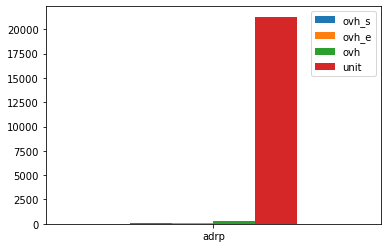

In [7]:
import pandas
ovh_s = [15923.404249668121-15866.257673740387]
ovh_e = [37492.70757961273-37458.40424966812]
ovh = [21626.449905872345 - 21291.0 ]
unit = [21291]
index = ['adrp']
df = pd.DataFrame({'ovh_s': ovh_s,
                   'ovh_e': ovh_e,
                  'ovh': ovh,
                  'unit': unit}, index=index)
ax = df.plot.bar(rot=0)
df

## Walltime utilization

In [10]:
"{} %".format((21291- 335.449906)/ 21291 * 100)

'98.4244520877366 %'